# Support Vector Machine
## Overview
A Support Vector Machine (SVM) is a surpervised learning algorithm which can be used for both classification and regression, though the most common use of SVMs is for classification. Though SVMs use linear separation to form the classes, SVMs can provide non-linear solutions. This is due to the transformations that are applied on the dataset to project the data onto a higher dimensional field. Then, instead of using a line to separate data in a 2D field, the SVM can use a plane to separate the data in a 3D field. This transformation into a higher dimension continues until the data can be linearly separated using, hyperplanes. The transformation function is known as the kernel function. Frequently, the number of dimensions needed is based on the number of features in the dataset.  
  
The following code is based on Avik's 100 Days of ML.  
Here's a link to Avik's SVM infographic:  
https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Info-graphs/Day%2012.jpg

## Importing the libraries

In [2]:
# import the usual libraries using the standard identifiers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
# read in the dataset, remember to modify the path name for your environment
#
# This dataset contains information on users in a social network. The data includes a user id, gender type,
# the age, and the estimated salary. A car company has just launched their brand new luxury SUV and they
# are trying to see which of these users of the social network are predicted to buy this brand new SUV.
# The last column indicates if the user bought this SUV (dependent variable). We are going to build a model 
# that is going to predict if a user is going to buy or not the SUV based on the age and the estimated salary
# independent variables. 
#
dataset = pd.read_csv('data/Social_Network_Ads.csv')
# let's take a quick look at the data attributes
print(dataset.head())
# set up the x using only the Age and EstimatedSalary attribute values
x = dataset.iloc[:,[2,3]].values
# set up the y with the Purchased attribute values
y = dataset.iloc[:, 4].values
# let's take a quick look at each data frame
print('shape of the full dataset looks like ', dataset.shape)
print('x looks like: ', x[0:3])
print('y looks like: ', y[0:3])

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
shape of the full dataset looks like  (400, 5)
x looks like:  [[   19 19000]
 [   35 20000]
 [   26 43000]]
y looks like:  [0 0 0]


## Splitting the dataset into the Training set and Test set

In [4]:
# we're going to use our usual 80/20 training/test data split to train the algorithm and to test it.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Feature scaling / normalization

In [5]:
# as usual, we wil normalize the data for the x and y data sets before we build and fit our model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# this will analyze the features and fit a normal mean and standard distribution and then transform the values
x_train_norm = sc.fit_transform(x_train) 
# using the previous fitted normalization this will transform the test set
x_test_norm = sc.transform(x_test)

print('Here is the scaled training data ', x_train_norm[:10])
print('Here is the scaled test data ', x_train_norm[:10])

Here is the scaled training data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Here is the scaled test data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVM to the Training set
  
 Details regarding the scikit-learn SVM classifier can be found at:  
 https://scikit-learn.org/stable/modules/svm.html

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(x_train_norm, y_train)
# let's look at the support vectors generated 
print(classifier.support_vectors_)

[[ 2.02016082e+00  3.78719297e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [ 1.04805336e+00 -1.42777990e-01]
 [ 7.56421121e-01  3.49747226e-01]
 [-2.12648508e-02  1.21890937e+00]
 [ 3.67578135e-01 -4.90442848e-01]
 [ 7.56421121e-01  7.55356227e-01]
 [ 2.70367388e-01  6.00265106e-02]
 [ 3.67578135e-01  2.91803083e-01]
 [-2.15686344e-01  1.46942725e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [ 3.67578135e-01 -1.42777990e-01]
 [-5.07318583e-01  1.24788144e+00]
 [ 2.70367388e-01  2.91803083e-01]
 [ 1.73156642e-01  2.33858940e-01]
 [ 7.56421121e-01 -3.16610419e-01]
 [ 2.02016082e+00 -8.09135634e-01]
 [ 7.56421121e-01  1.17970654e-01]
 [ 1.73156642e-01 -3.74554562e-01]
 [ 3.67578135e-01 -1.42777990e-01]
 [-1.18475597e-01  3.10544391e-02]
 [-2.12648508e-02 -1.42777990e-01]
 [ 9.50842613e-01  2.05909944e+00]
 [ 7.59458956e-02 -3.16610419e-01]
 [ 1.73156642e-01  6.00265106e-02]
 [-3.12897090e-01  5

## Predicting the Test set results

In [9]:
# use the trained and fitted model to generate a prediction based on the x_test set
y_pred = classifier.predict(x_test_norm)

print('The prediction looks like ', y_pred)

The prediction looks like  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


## Making the Confusion Matrix

[[57  1]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

   micro avg       0.91      0.91      0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



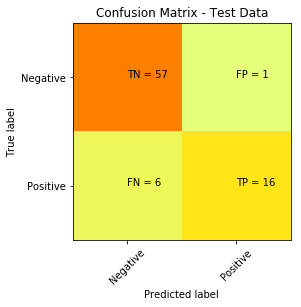

In [10]:
# let's visit our old friend the confusion matrix to see how well our model performs
# by comparing our y test data against our y predicted data
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

# let's plot the confusion matrix
# Thanks to the following site for excellent plot code for confusion matrices: 
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

